## Logistic Regression

This exercise will help to better understand the value of using logistic regression to make predictions for a dependent variable based on one independent variable.

The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction.

* The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others.

In [2]:
# Standard data libs
import pandas as pd
import numpy as np

# Visualization libs
import matplotlib.pyplot as plt
import seaborn as sns

# Data modeling libs

import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
# Import the raw data

airline_raw = pd.read_csv('./raw_data/Invistico_Airline.csv')
airline_raw.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


### Data exploration, data cleaning, and model preparation

In [4]:
airline_raw.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
airline_raw.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [6]:
airline_raw['satisfaction'].isna().sum()

np.int64(0)

In [7]:
airline_raw['satisfaction'].value_counts()

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [8]:
# Check for missing values in all attributes

airline_raw.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [9]:
float(round(airline_raw.isna().sum()['Arrival Delay in Minutes']/airline_raw.shape[0]*100, 2))

0.3

In [10]:
# Try to understand what is the meaning of the arrival delay in minutes

nas_adim = airline_raw['Arrival Delay in Minutes'].isna()
#nas_adim = nas_adim.any(axis=1)
nas_adim = airline_raw[nas_adim]
nas_adim

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,satisfied,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,4,...,5,5,4,1,4,2,3,5,20,NaN
246,satisfied,Loyal Customer,28,Personal Travel,Eco,1364,0,3,0,4,...,4,2,1,1,3,4,3,2,0,NaN
710,satisfied,Loyal Customer,28,Personal Travel,Eco,1792,0,5,0,3,...,5,5,4,4,5,3,4,5,24,NaN
736,satisfied,Loyal Customer,9,Personal Travel,Eco,1862,0,5,0,4,...,3,3,5,3,4,4,4,3,0,NaN
818,dissatisfied,Loyal Customer,9,Personal Travel,Eco,1668,1,0,1,1,...,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,satisfied,Loyal Customer,44,Business travel,Business,3431,2,2,3,2,...,4,5,5,5,5,5,5,4,70,NaN
128131,satisfied,Loyal Customer,39,Business travel,Business,1595,4,4,4,4,...,5,5,5,5,5,3,5,5,0,NaN
128710,satisfied,Loyal Customer,45,Business travel,Eco,871,5,1,1,1,...,2,5,5,5,5,1,5,5,100,NaN
129774,satisfied,disloyal Customer,49,Personal Travel,Eco,1594,5,4,5,2,...,3,3,1,4,3,3,4,3,0,NaN


In [11]:
nas_adim['satisfaction'].value_counts()

satisfaction
satisfied       205
dissatisfied    188
Name: count, dtype: int64

In [12]:
nas_adim[['Departure/Arrival time convenient','Online boarding']]

,Departure/Arrival time convenient,Online boarding
145,2,5
246,3,2
710,5,5
736,5,3
818,0,4
...,...,...
127739,2,4
128131,4,5
128710,1,5
129774,4,3


In [13]:
nas_adim.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,0.0
mean,39.162850,2113.229008,2.842239,3.111959,2.842239,3.005089,3.239186,3.295165,3.432570,3.450382,3.442748,3.414758,3.765903,3.366412,3.664122,3.366412,37.885496,NaN
std,15.707269,1094.182254,1.430551,1.537851,1.491659,1.324793,1.337753,1.377443,1.365074,1.302747,1.298510,1.339542,1.154476,1.268975,1.181991,1.329835,66.213936,NaN
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,27.000000,1376.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,NaN
50%,39.000000,2026.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,8.000000,NaN
75%,51.000000,2690.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,48.000000,NaN
max,72.000000,5549.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,530.000000,NaN


There is not enough information to understand the missing rows and the missing information in the "Arrival Delay in Minutes" attribute only represents 0.3% of the data set, on top of that, the dependet variable is almost equally distributed on but categories, so the rows with a null value for the "Arrival Delay in Minutes" will be dropped.

In [14]:
airline = airline_raw.dropna().reset_index(drop=True)

airline

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129483,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129484,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129485,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

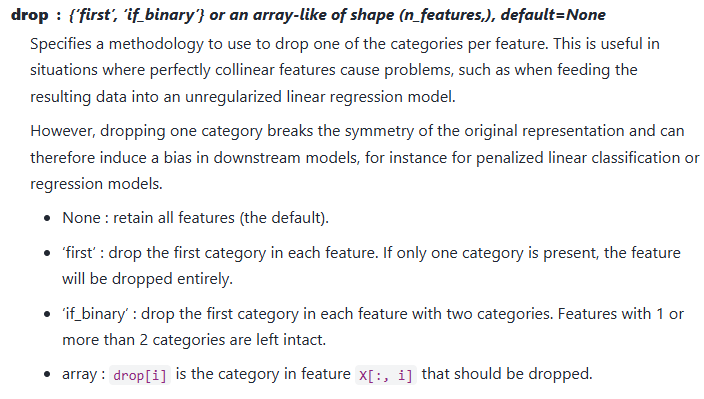

In [15]:
airline_subset = airline[['Flight Distance', 'Seat comfort','Inflight entertainment','Departure Delay in Minutes', 'satisfaction']]
airline_subset['satisfaction_cat'] = OneHotEncoder(drop='first').fit_transform(airline_subset[['satisfaction']]).toarray()
airline_subset = airline_subset.astype({'Inflight entertainment':float})
airline_subset

C:\Users\andre\AppData\Local\Temp\ipykernel_11804\3447677919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_subset['satisfaction_cat'] = OneHotEncoder(drop='first').fit_transform(airline_subset[['satisfaction']]).toarray()


,Flight Distance,Seat comfort,Inflight entertainment,Departure Delay in Minutes,satisfaction,satisfaction_cat
0,265,0,4.0,0,satisfied,1.0
1,2464,0,2.0,310,satisfied,1.0
2,2138,0,0.0,0,satisfied,1.0
3,623,0,4.0,0,satisfied,1.0
4,354,0,3.0,0,satisfied,1.0
...,...,...,...,...,...,...
129482,1731,5,5.0,0,satisfied,1.0
129483,2087,2,1.0,174,dissatisfied,0.0
129484,2320,3,2.0,155,dissatisfied,0.0
129485,2450,3,2.0,193,dissatisfied,0.0


<Axes: xlabel='Departure Delay in Minutes', ylabel='satisfaction_cat'>

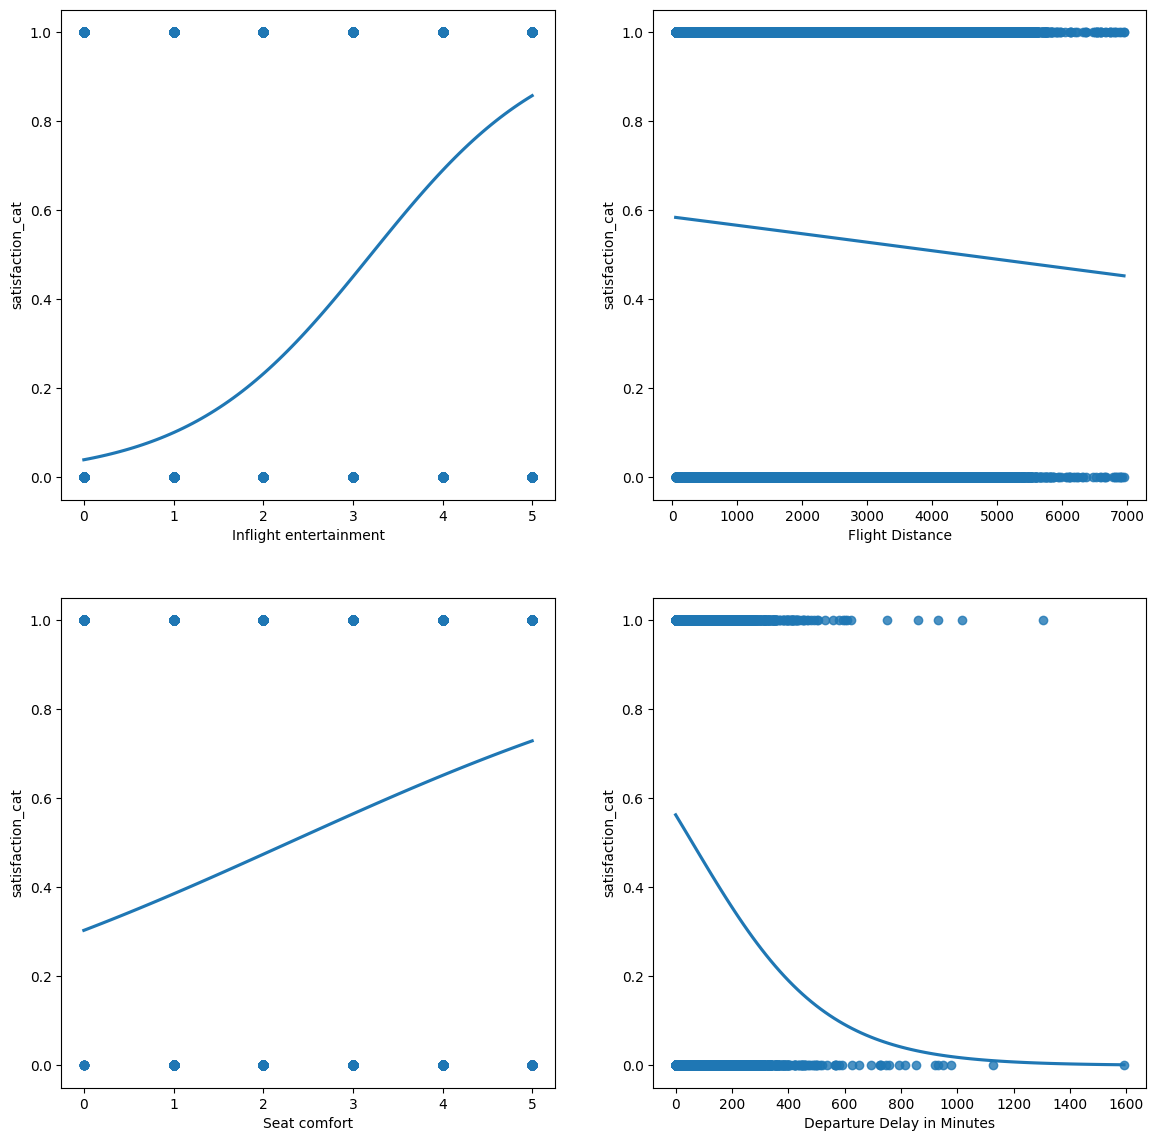

In [17]:
fig , axes = plt.subplots(2,2,figsize = (14,14))

sns.regplot(
    data= airline_subset,
    x= 'Inflight entertainment',
    y = 'satisfaction_cat',
    logistic=True,
    ci=None, # ci; Confidence Interval => According to the documentation:  for large datasets, it may be advisable to avoid that computation by setting this parameter to None
    ax= axes[0,0]
)

sns.regplot(
    data= airline_subset,
    x= 'Flight Distance',
    y = 'satisfaction_cat',
    logistic=True,
    ci=None,
    ax= axes[0,1]
)

sns.regplot(
    data= airline_subset,
    x= 'Seat comfort',
    y = 'satisfaction_cat',
    logistic=True,
    ci=None,
    ax= axes[1,0]
)

sns.regplot(
    data= airline_subset,
    x= 'Departure Delay in Minutes',
    y = 'satisfaction_cat',
    logistic=True,
    ci=None,
    ax= axes[1,1]
)

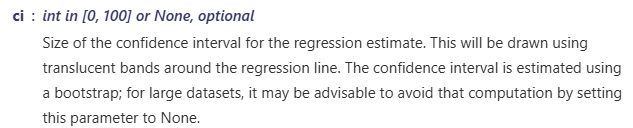

https://seaborn.pydata.org/generated/seaborn.regplot.html